In [3]:
pip install stata-setup

Note: you may need to restart the kernel to use updated packages.


In [4]:
import stata_setup
stata_setup.config("C:/Program Files/Stata18/", "be")



  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      StataNow 18.5
___/   /   /___/   /   /___/       BE—Basic Edition

 Statistics and Data Science       Copyright 1985-2023 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-782-8272        https://www.stata.com
                                   979-696-4600        service@stata.com

Stata license: Single-user , expiring 14 Dec 2024
Serial number: 301809021570
  Licensed to: Tato Khundadze
               The New School

Notes:
      1. Unicode is supported; see help unicode_advice.


In [7]:
%%stata
cd "G:\My Drive\semmler_data_panel"

G:\My Drive\semmler_data_panel


In [8]:
%%stata
import excel "data_analysis.xlsx", firstrow clear 


(4 vars, 132 obs)


In [9]:
%%stata
rename *, lower 



. encode country, gen(country1)

. xtset country1 year 

Panel variable: country1 (strongly balanced)
 Time variable: year, 1990 to 2022
         Delta: 1 unit

. 
. xtline onshorewindlevelizedcostofe 

. 


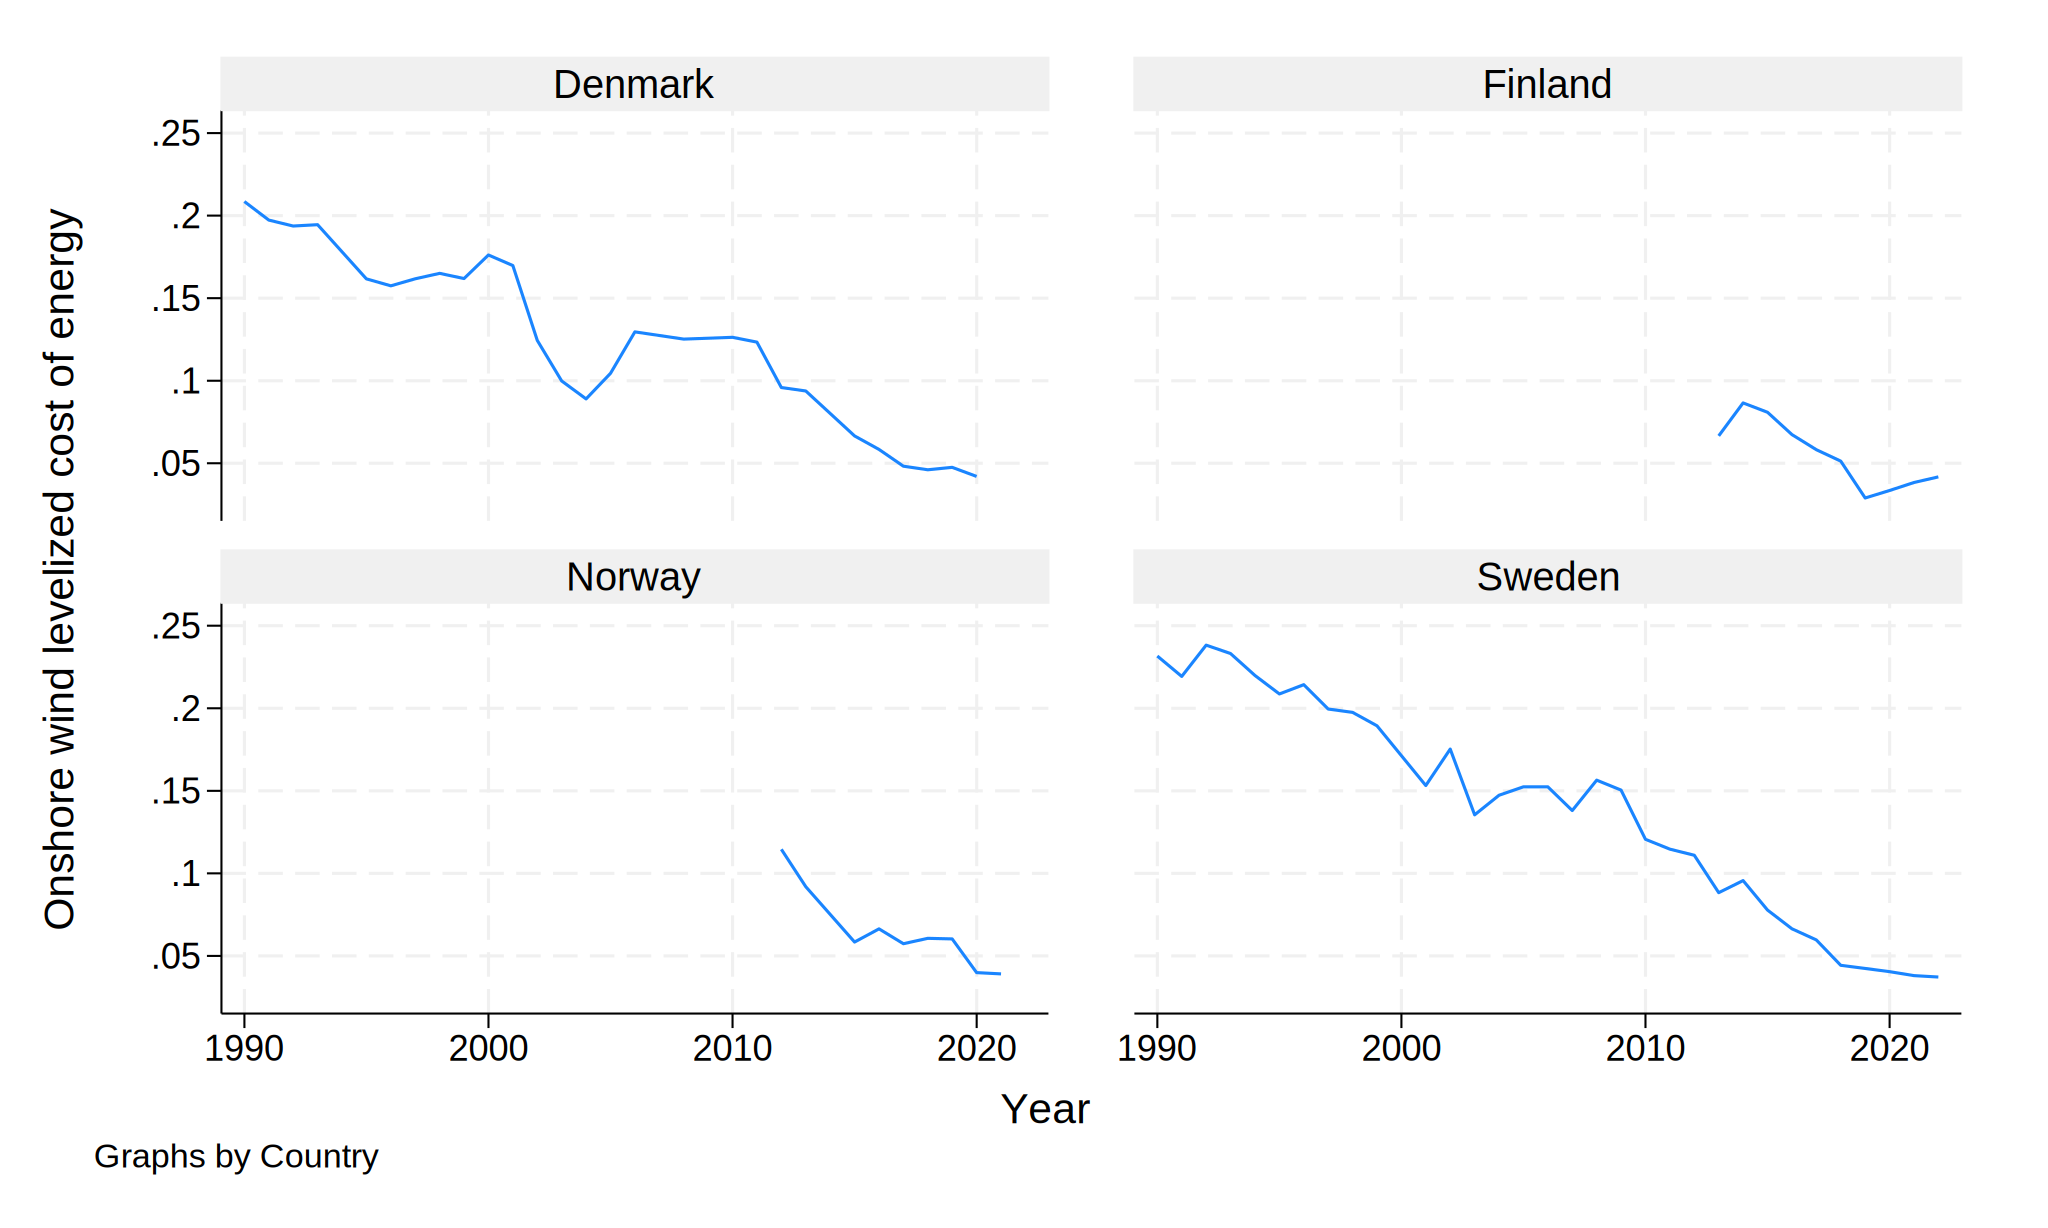

In [10]:
%%stata
encode country, gen(country1)
xtset country1 year 

xtline onshorewindlevelizedcostofe 

In [11]:
%%stata
gen log_renewable_energy_share = log(renewable_energy_share+1)

gen log_onshorewindlevelizedcostofe = log(onshorewindlevelizedcostofe+1)


. gen log_renewable_energy_share = log(renewable_energy_share+1)

. 
. gen log_onshorewindlevelizedcostofe = log(onshorewindlevelizedcostofe+1)
(54 missing values generated)

. 


In [12]:
%%stata
* Regression on levels 
xtsum  renewable_energy_share onshorewindlevelizedcostofe  

xtreg  renewable_energy_share onshorewindlevelizedcostofe, fe 

xtreg  renewable_energy_share onshorewindlevelizedcostofe, fe robust

* regression on logs 
xtreg  log_renewable_energy_share log_onshorewindlevelizedcostofe , fe   
xtreg  log_renewable_energy_share log_onshorewindlevelizedcostofe , fe vce(robust)  


* bootstrap
xtreg  renewable_energy_share onshorewindlevelizedcostofe, fe vce(bootstrap)

xtreg  log_renewable_energy_share log_onshorewindlevelizedcostofe , fe vce(bootstrap)


. * Regression on levels 
. xtsum  renewable_energy_share onshorewindlevelizedcostofe  

Variable         |      Mean   Std. dev.       Min        Max |    Observations
-----------------+--------------------------------------------+----------------
renewa~e overall |  55.13682   30.23881   2.908093   99.82068 |     N =     132
         between |             30.53895   32.88219   98.83422 |     n =       4
         within  |             14.47673   25.16273    104.305 |     T =      33
                 |                                            |
onshor~e overall |  .1148908   .0613678    .028992    .238245 |     N =      78
         between |             .0419029   .0553672   .1390632 |     n =       4
         within  |             .0523727   .0130476   .2140726 | T-bar =    19.5

. 
. xtreg  renewable_energy_share onshorewindlevelizedcostofe, fe 

Fixed-effects (within) regression               Number of obs     =         78
Group variable: country1                        Number of

In [14]:
%%stata
* FGLS  

xtgls renewable_energy_share onshorewindlevelizedcostofe, panels(heteroskedastic) 
xtgls log_renewable_energy_share log_onshorewindlevelizedcostofe, panels(heteroskedastic)


. * FGLS  
. 
. xtgls renewable_energy_share onshorewindlevelizedcostofe, panels(heteroskedas
> tic) 

Cross-sectional time-series FGLS regression

Coefficients:  generalized least squares
Panels:        heteroskedastic
Correlation:   no autocorrelation

Estimated covariances      =         4          Number of obs     =         78
Estimated autocorrelations =         0          Number of groups  =          4
Estimated coefficients     =         2          Obs per group:
                                                              min =          9
                                                              avg =       19.5
                                                              max =         32
                                                Wald chi2(1)      =      14.34
                                                Prob > chi2       =     0.0002

------------------------------------------------------------------------------
renewable_~e | Coefficient  Std. err.      z    